In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training_data = np.array(((-1.0,-0.1),(0.3,0.5),(2.0,0.5)))

In [2]:
print training_data

[[-1.  -0.1]
 [ 0.3  0.5]
 [ 2.   0.5]]


In [66]:
def output_neuron(w,x):   
    x = np.vstack((np.ones(x.shape),x))   
    return np.dot(w.T,x)

In [75]:
def error(w, traning_data):
    simple_error = output_neuron(w,training_data[:,0])-training_data[:,1]
    return 0.5*np.dot(simple_error,simple_error.T)  

In [76]:
def grad(w, training_data):
    x = np.vstack((np.ones(training_data[:,0].shape),training_data[:,0])) 
    h = np.dot(x,x.T)
    b = np.asmatrix(np.dot(-x,training_data[:,1].T)).T #da gibt es bestimmt einen schöneren weg?
    return h.dot(w)+b

In [77]:
weights = np.random.uniform(-1,1,(1,2)).T

x = training_data[:,0]

a = output_neuron(weights, x)

print "a",a

err = error(weights, training_data)

print "error", err

#g = grad(weights, training_data)

#print "grad", g


a [[ 1.11525745  0.30884998 -0.74568286]]
error [[ 1.5325574]]


###### 4.1 Regular and Conjugate Gradient

*a) Gradient Descent*

[[-0.05996512]
 [ 0.19503981]]
[[ 0.15217145]]
[[ 0.05732204]]


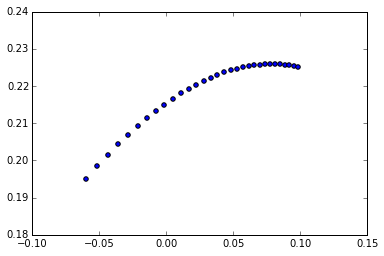

In [112]:
def gradient_descent(w, training_data, eta=0.2):
    return w-eta*grad(w,training_data)

weights = np.random.uniform(-1,1,(1,2)).T
print weights

weight_hist_grad_desc = weights


err = error(weights, training_data)
print err

for i in range(30):
    weights = gradient_descent(weights,training_data,0.01)
    #print weights
    weight_hist_grad_desc = np.concatenate((weight_hist_grad_desc,weights), axis=1)

err = error(weights, training_data)
print err
#print "weight_hist_grad_desc", weight_hist_grad_desc

plt.scatter(weight_hist_grad_desc[0,:],weight_hist_grad_desc[1,:])
    

*b) Line Search*

[[-0.44828545]
 [-0.64184263]]
[[ 3.18469046]]
[[  1.29090165e+181]]


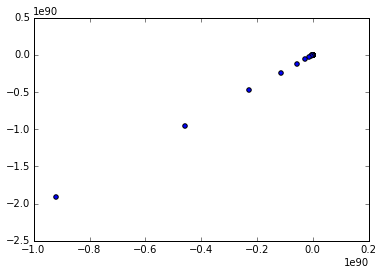

In [123]:
def line_search(w,training_data):
    g = grad(w,training_data)
    x = np.vstack((np.ones(training_data[:,0].shape),training_data[:,0])) 
    h = np.dot(x,x.T)
    eta = - (g.T*g)/(g.T*h*g)
    return w-eta[0,0]*g


weights = np.random.uniform(-1,1,(1,2)).T
print weights

weight_hist_line_search = weights


err = error(weights, training_data)
print err

for i in range(300):
    weights = line_search(weights,training_data)
    #print weights
    weight_hist_line_search = np.concatenate((weight_hist_line_search,weights), axis=1)

err = error(weights, training_data)
print err
#print "weight_hist_grad_desc", weight_hist_grad_desc

plt.scatter(weight_hist_line_search[0,:],weight_hist_line_search[1,:])

*c) Conjugate Gradient*

In [ ]:
def conjugate_grad(w,training_data):
    d = - gradient_descent(w,training_data)
    